# Visión artificial

La visión artificial es una intersección entre distintas ramas de las ciencias de la computación cuyo objetivo final es la comprensión de imágenes digitales.

Veremos tres ramas de la visión artificial:
- Procesamiento digital de imágenes
- Análisis de imágen
- Reconocimiento de objetos/patrones.

## Contenido del curso
1. ¿Qué es Visión Artificial?
2. Adquisición, Muestreo y Cuantización
3. Transformaciones del color
4. Pre-procesamiento y Filtrado
5. Segmentación y Operaciones Morfológicas
6. Extracción y Selección de Características
7. Métodos de Clasificación para Reconocimiento de Patrones

## Procesamiento digital de imágenes (PDI)

La primera de las ramas a discutir, el procesamiento digital de imágenes, trata con las transformaciones y operaciones realizadas sobre una imagen o conjunto de imagenes con el objetivo de mejorar la calidad de la información en términos de su contraste, nítidez o limpieza, realizar transformaciones espaciales y extraer objetos o características de interés tales como segmentos o bordes.

El procesamiento digital de imágenes consiste en aplicar una transformación $F$ sobre una imagen $I$ para obtener una imagen de salida $G$.

### $$\color{yellow}{G = F(I)}$$
Una transformación de procesamiento de imágenes no se limita a una única imagen de entrada:
### $$\color{yellow}{G = F(I_1, I_2, I_3,...,I_n)}$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, filters, util, io
from skimage.morphology import disk

from skimage.transform import resize
import cv2

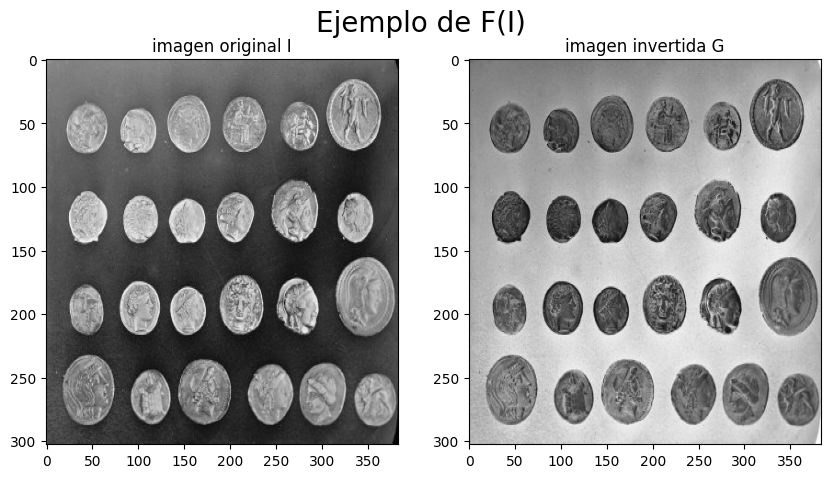

In [2]:
def F(I):
    return 255 - I

I = data.coins()

G = F(I)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

fig.suptitle('Ejemplo de F(I)', fontsize=20)

ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')

ax2.set_title('imagen invertida G')
ax2.imshow(G, cmap='gray', aspect='auto')

plt.show()

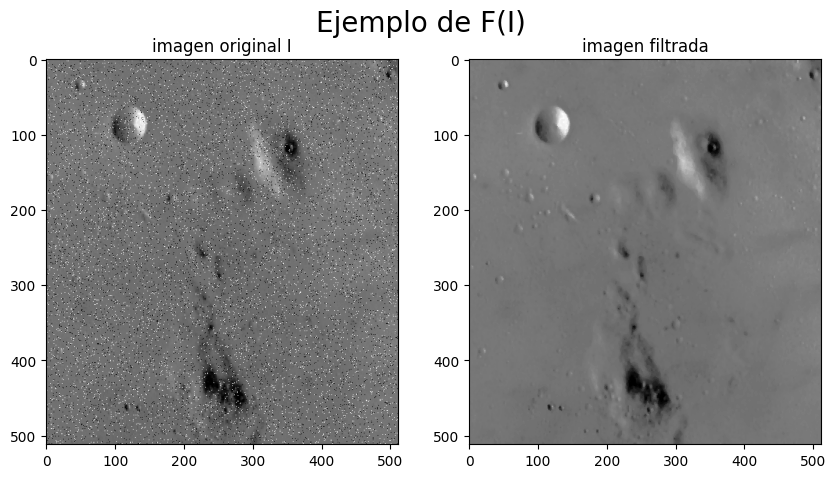

In [3]:
def F(I):
    return filters.median(I, disk(2))

I = util.random_noise(data.moon(), mode='s&p')

G = F(I)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))

fig.suptitle('Ejemplo de F(I)', fontsize=20)

ax1.set_title('imagen original I')
ax1.imshow(I, cmap='gray', aspect='auto')

ax2.set_title('imagen filtrada')
ax2.imshow(G, cmap='gray', aspect='auto')

plt.show()

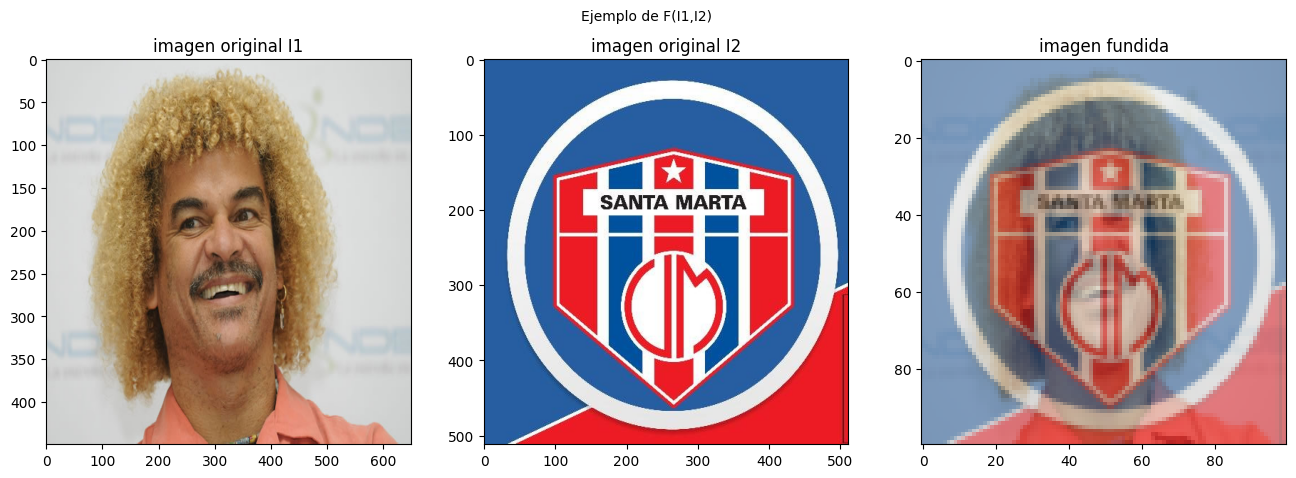

In [4]:
def F(I1, I2, k):
    I1 = resize(I1,(100,100))
    I2 = resize(I2,(100,100))
    k = k
    return (1-k) * I1 + k * I2


I1 = io.imread(r"imagenes\pibe.jpg")
I2 = io.imread(r"imagenes\union.jpg")

G = F(I1,I2,0.5)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16, 5))

fig.suptitle('Ejemplo de F(I1,I2)', fontsize=10)

ax1.set_title('imagen original I1')
ax1.imshow(I1, cmap='gray', aspect='auto')

ax2.set_title('imagen original I2')
ax2.imshow(I2, cmap='gray', aspect='auto')

ax3.set_title('imagen fundida')
ax3.imshow(G, cmap='gray', aspect='auto')

plt.show()

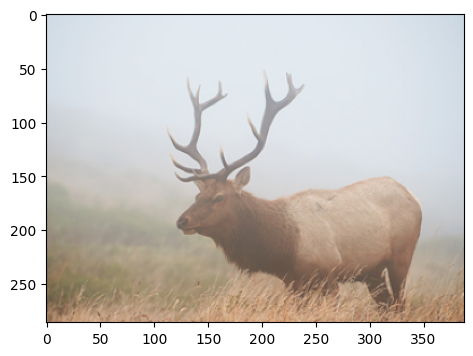

In [5]:
img = cv2.imread('imagenes/alce.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (8,4))
plt.imshow(img_rgb)
plt.show()

In [6]:
n,m,l = img_rgb.shape
n,m,l

(286, 388, 3)

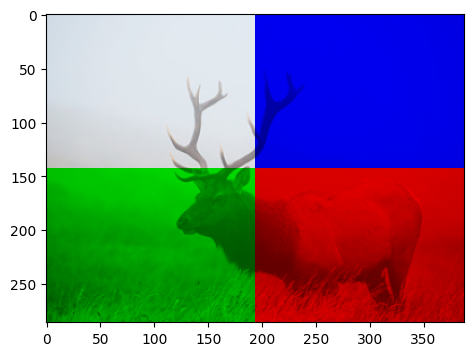

In [7]:
n_half = int(n/2)
m_half = int(m/2)

R, G, B = (0,1,2)

img_rgb[0:n_half, m_half:m, (R,G)] = 0
img_rgb[n_half:n, 0:m_half, (R,B)] = 0
img_rgb[n_half:n, m_half:m, (G,B)] = 0

plt.figure(figsize = (8,4))
plt.imshow(img_rgb)
plt.show()

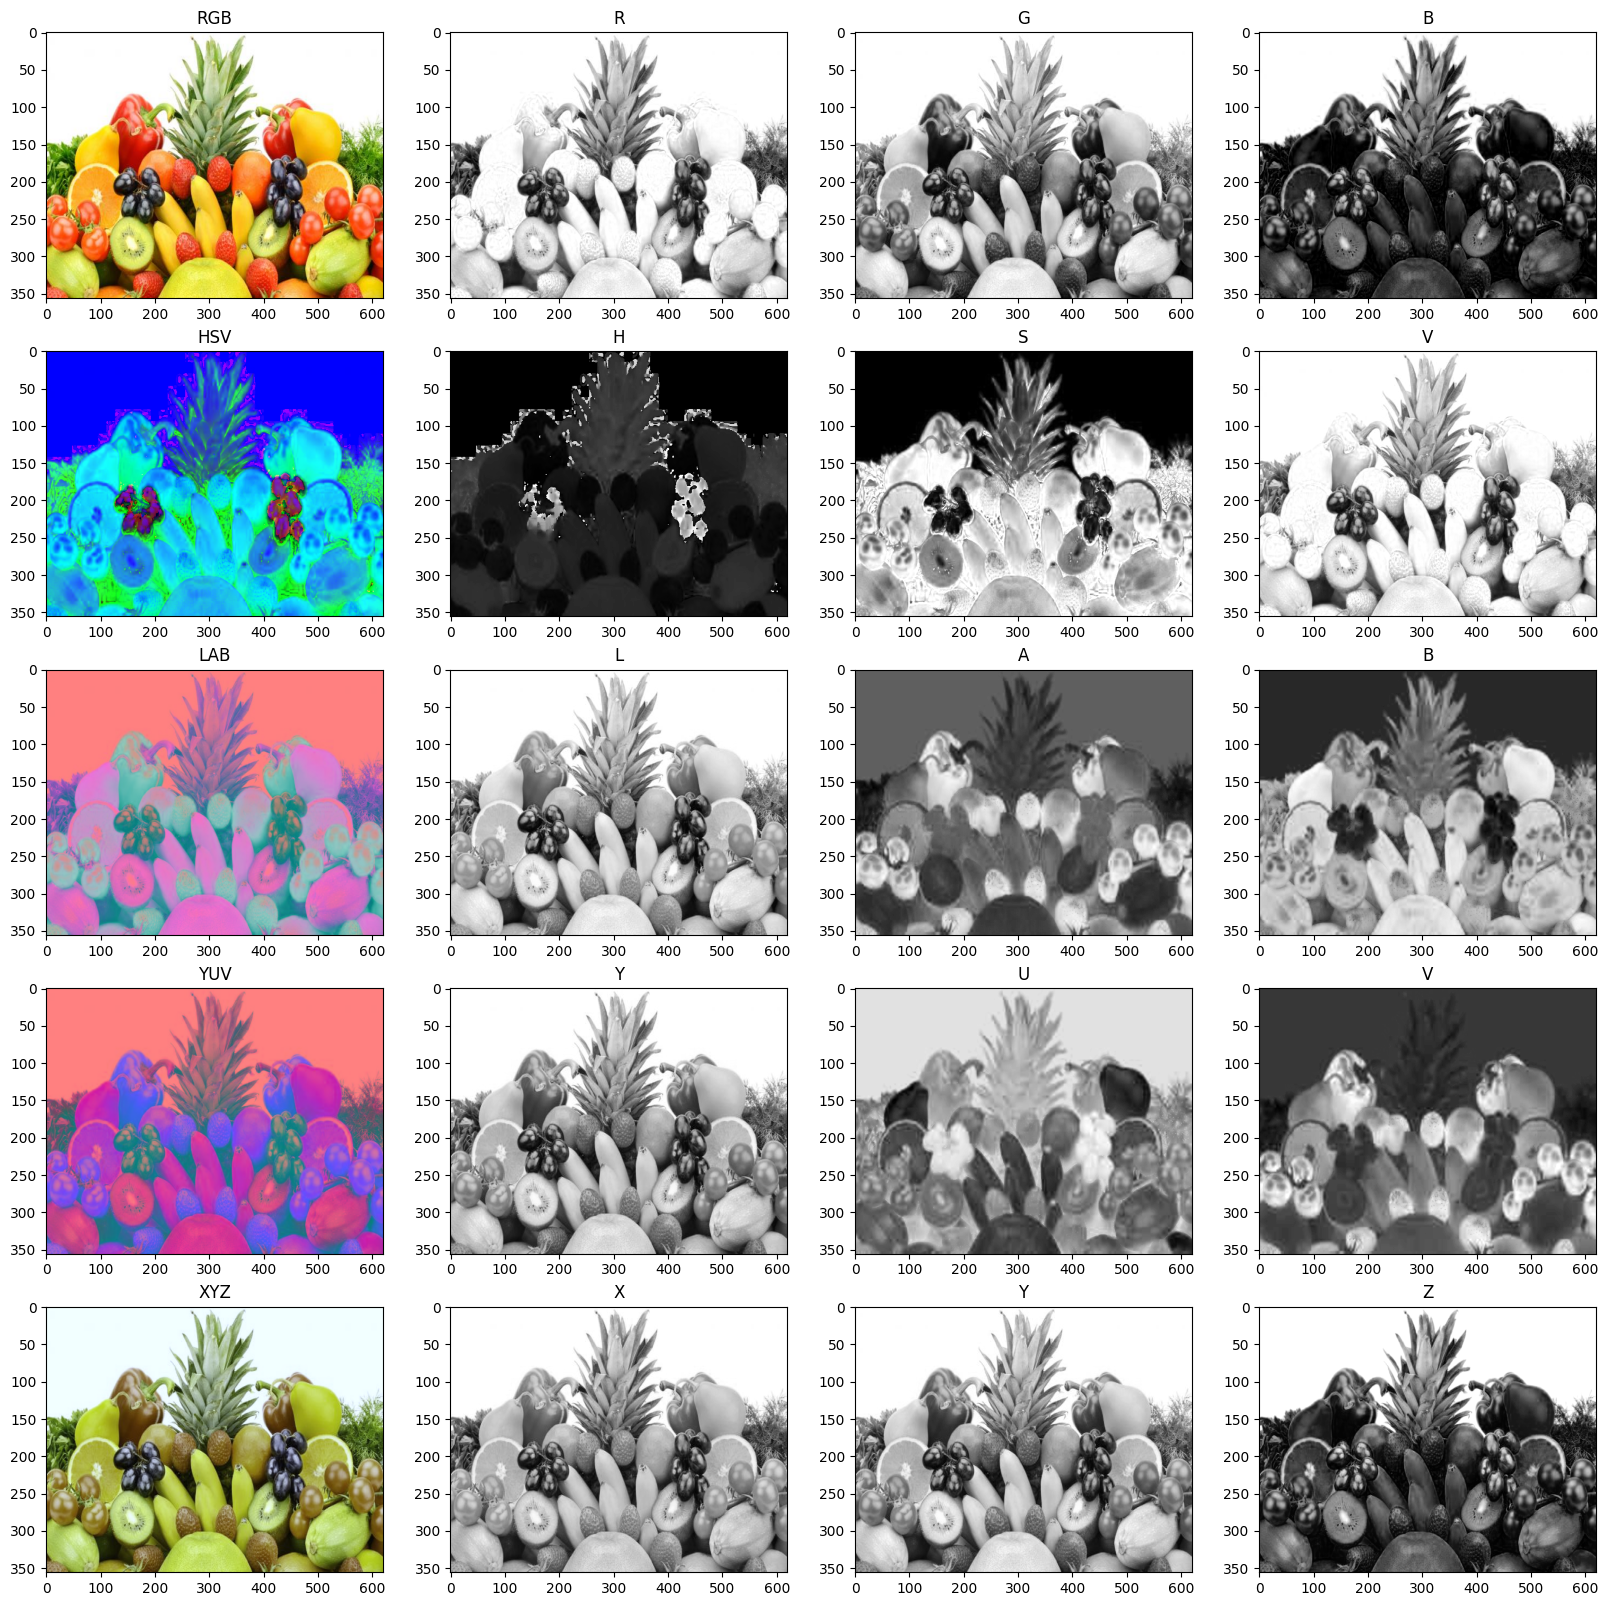

In [9]:
img = cv2.imread('imagenes/frutas.jpg', cv2.IMREAD_COLOR)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_xyz = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)

imagenes = [img_rgb, img_hsv, img_lab, img_yuv, img_xyz]
espacios = ['RGB', 'HSV', 'LAB', 'YUV', 'XYZ']

filas = len(imagenes)
columnas = 4

fig, axs = plt.subplots(filas, columnas, figsize=(20,20))
ax = axs.ravel()

contador = 0
for imagen, espacio in zip(imagenes, espacios):
    ax[contador].set_title(espacio)
    ax[contador].imshow(imagen, aspect='auto')
    contador += 1
    for canal in range(3):
        ax[contador].set_title(espacio[canal])
        ax[contador].imshow(imagen[:,:,canal], cmap='gray', aspect='auto')
        contador += 1

plt.show()

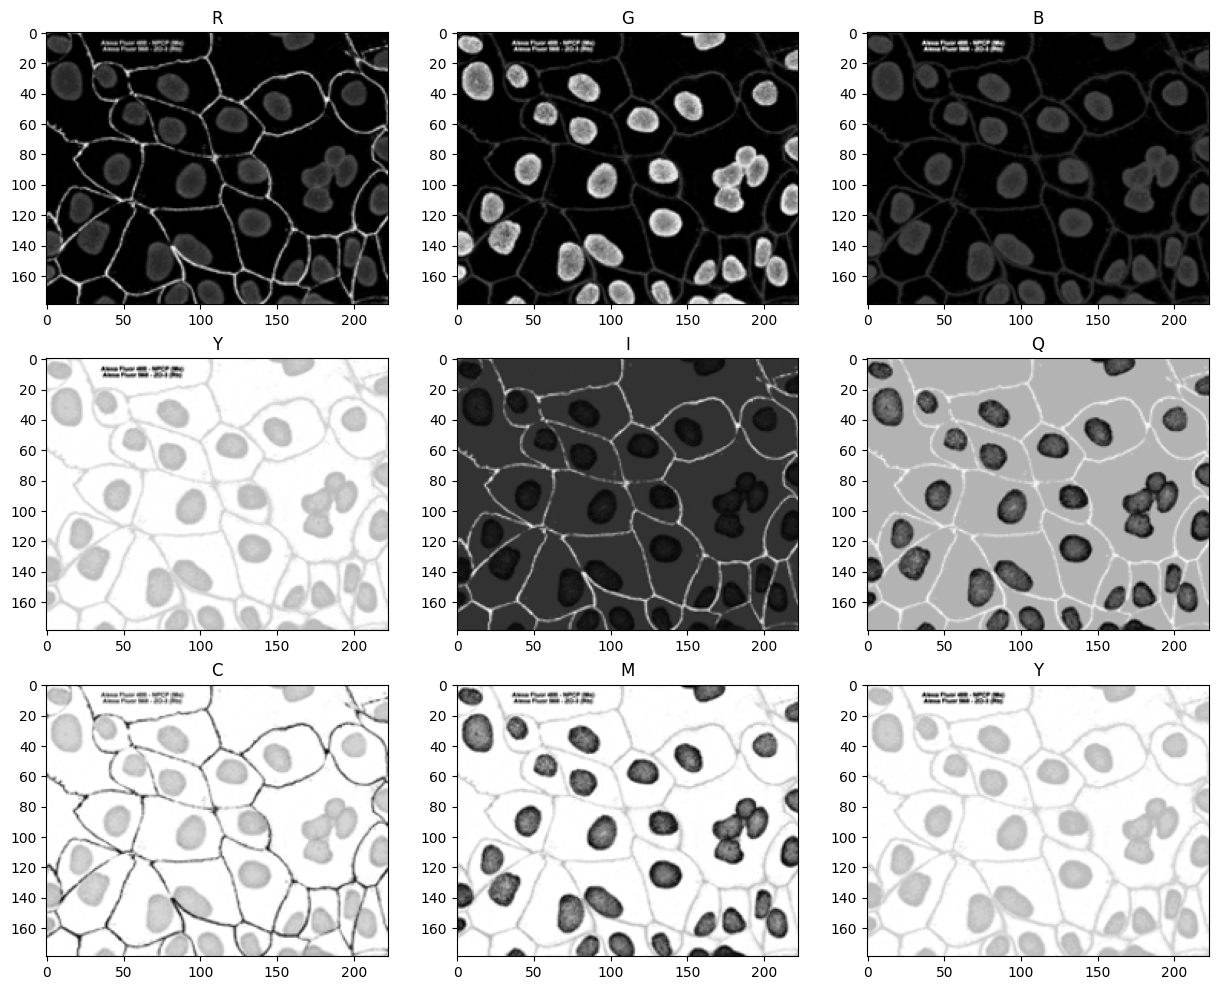

In [11]:
img = cv2.imread('imagenes/cells.png', cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

img_Y = 0.30*img_R + 0.59*img_G + 0.11*img_B
img_I = -0.27*(img_B - img_Y) + 0.74*(img_R - img_Y)
img_Q = 0.41*(img_B - img_Y) + 0.48*(img_R - img_Y)

img_C = 255 - img_R
img_M = 255 - img_G
img_Y = 255 - img_B


fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(15, 12))

ax1.set_title('R')
ax1.imshow(img_R, cmap='gray', aspect='auto')

ax2.set_title('G')
ax2.imshow(img_G, cmap='gray', aspect='auto')

ax3.set_title('B')
ax3.imshow(img_B, cmap='gray', aspect='auto')

ax4.set_title('Y')
ax4.imshow(img_Y, cmap='gray', aspect='auto')

ax5.set_title('I')
ax5.imshow(img_I, cmap='gray', aspect='auto')

ax6.set_title('Q')
ax6.imshow(img_Q, cmap='gray', aspect='auto')

ax7.set_title('C')
ax7.imshow(img_C, cmap='gray', aspect='auto')

ax8.set_title('M')
ax8.imshow(img_M, cmap='gray', aspect='auto')

ax9.set_title('Y')
ax9.imshow(img_Y, cmap='gray', aspect='auto')

plt.show()